In [13]:
#Program to plot  a hyperbola
import numpy as np
from coeffs import *
import matplotlib.pyplot as plt
from numpy import linalg as LA



In [14]:
#setting up plot
#fig = plt.figure()
#ax = fig.add_subplot(111, aspect='equal')
len = 12000
theta = np.linspace(-5,5,len)

#Given hyperbola parameters
#Eqn : x.T@V@x = F
V = np.array(([3,0],[0,-1]))
F = 3

In [15]:
A = np.array([np.sqrt(2),np.sqrt(3)]) 
print(A)
B = np.array([1/np.sqrt(2),0])
m = np.linalg.norm(B-A)
x_AB = line_gen(B,A)

#Standard Eqn : y.T@D@y=1
#comparing these equations, get :  
#y = P.T@x/sqrt(F)
#P.T@V@P = D
#P.T@P = I

eigval,eigvec = LA.eig(V)
print(eigval)
print(eigvec)

[1.41421356 1.73205081]
[ 3. -1.]
[[1. 0.]
 [0. 1.]]


In [17]:
D = np.diag(eigval)
P = eigvec
print("D=\n",D)
print("P=\n",P)

#Generating points on the hyperbola at origin
#y = np.zeros((2,len))
#y[0,:] = 1/eigval[0]*np.cosh(theta)
#y[1,:] = 1/eigval[1]*np.sinh(theta)

#Standard hyperbola : y.T@D@y=1
y1 = np.linspace(-1,1,len)
y2 = np.sqrt((1-D[0,0]*np.power(y1,2))/(D[1,1]))
y3 = -1*np.sqrt((1-D[0,0]*np.power(y1,2))/(D[1,1]))
y = np.hstack((np.vstack((y1,y2)),np.vstack((y1,y3))))


D=
 [[ 3.  0.]
 [ 0. -1.]]
P=
 [[1. 0.]
 [0. 1.]]


/home/suresh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/home/suresh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


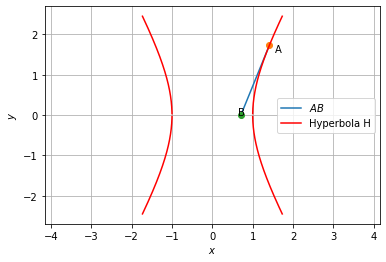

In [18]:
#Affine Transformation
#Equation : y = P.T@(x-c)/(K**0.5)
x = (P @ (y)) * F**0.5

plt.plot(x_AB[0,:],x_AB[1,:],label='$AB$')


plt.plot(A[0], A[1], 'o')
plt.text(A[0] * (1 + 0.1), A[1] * (1 - 0.1) , 'A')
plt.plot(B[0], B[1], 'o')
plt.text(B[0] * (1 - 0.1), B[1] * (1) , 'B')


#Plotting required hyperbola
plt.plot(x[0,:len],x[1,:len],color='r',label='Hyperbola H')
plt.plot(x[0,len+1:],x[1,len+1:],color='r')

ax.plot()
plt.xlabel('$x$');plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()
plt.axis('equal')

#if using termux
#plt.savefig('../figs/hyperloop.pdf')
#plt.savefig('../figs/hyperloop.eps')
#subprocess.run(shlex.split("termux-open ../figs/hyperloop.pdf"))
#else

plt.show()
